In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from autograd import numpy as np
from autograd import grad
from autograd import hessian

from scipy import optimize as opt
from matplotlib import pyplot as plt

In [3]:
import initdirs

from pdata.visualize import plot_contour
from pdata.visualize import plot_grad_as_vector_field
from pdata.optimize import eval_grad_on_meshgrid

$f(x, y) = sin(x) + (1 - y) sin(x) + 0.2 x^2 + 0.2 y^2 + 3$

In [4]:
# Another interesting option:
#return (1 - x[0]) * np.sin(x[0]) + np.cos(x[1]) + 0.3 * (x[0] - 3)**2 + 0.05 * x[1]**2

      fun: 0.2510289678553961
 hess_inv: array([[0.75549041, 0.0021045 ],
       [0.0021045 , 0.30207029]])
      jac: array([-4.47034836e-07,  1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 10
     njev: 16
   status: 0
  success: True
        x: array([-1.11051086, -1.68909433])


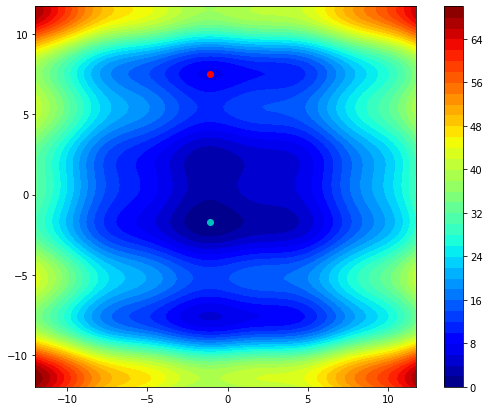

In [5]:
SIZE = 12

x_range = np.arange(-SIZE, SIZE, 0.25)
y_range = np.arange(-SIZE, SIZE, 0.25)
domain_xy = np.meshgrid(x_range, y_range)

def func(x):
    return np.sin(x[0]) + (1 - x[1]) * np.sin(x[1]) + 0.2 * x[0]**2 + 0.2 * x[1]**2 + 3

func_z = func(domain_xy)

res1 = opt.minimize(func, x0=[10, 10])
res2 = opt.minimize(func, x0=[7.5, 5])

print(res2)

fig = plt.figure(figsize=(10, 7))

plot_contour(domain_xy[0], domain_xy[1], func_z, fig=fig, cmap='jet', levels=40)

plt.scatter(res1.x[0], res1.x[1], color='r')
plt.scatter(res2.x[0], res2.x[1], color='c')

plt.show()

In [6]:
func_grad = grad(func)
func_hess = hessian(func)

In [7]:
guess = [10, 10]

x_interim = [guess, ]

def monitor(x):
    x_interim.append(x)

res = opt.minimize(
    func, 
    x0=guess, 
    method='Newton-CG', 
    jac=func_grad,
    #hess=func_hess, 
    options={'eps': 4e-2}, 
    callback=monitor
)

print(res)

     fun: 0.2510289678553099
     jac: array([-2.84962326e-09, -2.19142149e-10])
 message: 'Optimization terminated successfully.'
    nfev: 12
    nhev: 0
     nit: 8
    njev: 30
  status: 0
 success: True
       x: array([-1.11051051, -1.68909438])


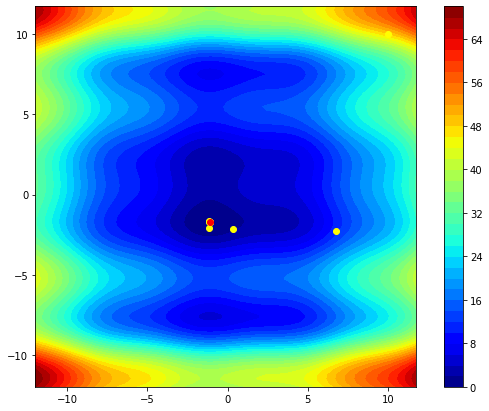

In [8]:
x_interim_np = np.array(x_interim)

fig = plt.figure(figsize=(10, 7))

plot_contour(domain_xy[0], domain_xy[1], func_z, fig=fig, cmap='jet', levels=40)

plt.scatter(x_interim_np[:, 0], x_interim_np[:, 1], color='yellow')

plt.scatter(res.x[0], res.x[1], color='r')
plt.show()